Download MNIST data


In [ ]:
import tensorflow as tf
import numpy as np
import os
import distutils

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension and scale to [0,1]
x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Download CIFAR10 data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert y to one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Optional data augmentation - add mirrored versions of training images to training set. Obviously, it won't work with MNIST. 

In [ ]:
x_train2 = np.zeros((x_train.shape[0]*2,x_train.shape[1],x_train.shape[2],x_train.shape[3]),dtype=np.float32)
x_train2[:x_train.shape[0]] = x_train
x_train2[x_train.shape[0]:] = x_train[:,:,::-1]
x_train = x_train2
y_train = np.vstack((y_train,y_train))
print(x_train.shape,y_train.shape)

(100000, 32, 32, 3) (100000, 10)


Model definition

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from keras.models import Model
from keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
import os
import distutils
 
#dropout layer, also try Spatial Dropout
#model.add(tf.keras.layers.Dropout(.5))
#model.add(tf.keras.layers.BatchNormalization())
#kernel_regularizer=tf.keras.regularizers.l2(0.001),
 
def cnn_model(input_shape=(28,28,1)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, (3, 3),kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=input_shape, activation='relu'))
  model.add(Dropout(.3))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(.3))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Conv2D(96, (3, 3), activation='relu'))
  model.add(Dropout(.3))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  model.add(Flatten())
  model.add(Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Build model

In [ ]:
model = cnn_model(x_train.shape[1:])
loss, val_loss, accuracy, val_accuracy = [], [], [], []
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 64)       

Compile model

In [ ]:
lr = 1e-3
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Train model - it can be run multiple times and it will start from where it left off

In [ ]:
#play with batch size
batch_size = 500
epochs = 30

history = model.fit(
    x_train, y_train,
    initial_epoch = len(loss),
    epochs =  epochs + len(loss), 
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    batch_size=batch_size, 
    verbose = 1,
)

loss = loss + history.history['loss']
val_loss = val_loss + history.history['val_loss']
accuracy = accuracy + history.history['accuracy']
val_accuracy = val_accuracy + history.history['val_accuracy']

print('Lowest training loss = {:9.6f}, in epoch {} '.format(np.amin(loss),np.argmin(loss)+1))
print('Lowest validation loss = {:9.6f}, in epoch {} '.format(np.amin(val_loss),np.argmin(val_loss)+1))
print('Highest training accuracy = {:9.6f}, in epoch {} '.format(np.amax(accuracy),np.argmax(accuracy)+1))
print('Highest validation accuracy = {:9.6f}, in epoch {} '.format(np.amax(val_accuracy),np.argmax(val_accuracy)+1))

model.save_weights('last_model.h5', overwrite=True)

Epoch 131/160
120/120 [==============================] - 2s 21ms/step - loss: 0.1190 - accuracy: 0.9640 - val_loss: 0.2444 - val_accuracy: 0.9245
Epoch 132/160
120/120 [==============================] - 2s 20ms/step - loss: 0.1226 - accuracy: 0.9623 - val_loss: 0.2492 - val_accuracy: 0.9226
Epoch 133/160
120/120 [==============================] - 2s 20ms/step - loss: 0.1192 - accuracy: 0.9638 - val_loss: 0.2893 - val_accuracy: 0.9081
Epoch 134/160
120/120 [==============================] - 2s 20ms/step - loss: 0.1219 - accuracy: 0.9622 - val_loss: 0.2771 - val_accuracy: 0.9122
Epoch 135/160
120/120 [==============================] - 2s 20ms/step - loss: 0.1245 - accuracy: 0.9615 - val_loss: 0.2695 - val_accuracy: 0.9168
Epoch 136/160
120/120 [==============================] - 2s 20ms/step - loss: 0.1219 - accuracy: 0.9621 - val_loss: 0.2887 - val_accuracy: 0.9090
Epoch 137/160
120/120 [==============================] - 2s 20ms/step - loss: 0.1199 - accuracy: 0.9632 - val_loss: 0.2656 -

In [ ]:
print(x_train.shape)

(100000, 32, 32, 3)


Plot results


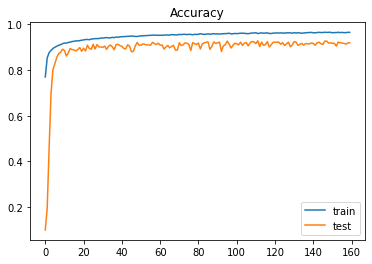

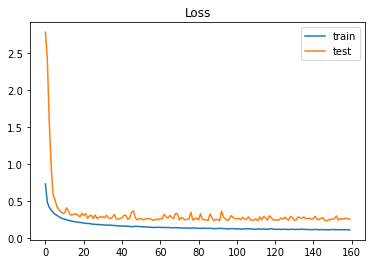

In [ ]:
fig, ax = plt.subplots()
ax.plot(accuracy,label = 'train')
ax.plot(val_accuracy,label = 'test')
ax.set_title('Accuracy')
ax.legend(loc='lower right')
fig, ax = plt.subplots()
ax.plot(loss,label = 'train')
ax.plot(val_loss,label = 'test')
ax.set_title('Loss')
ax.legend(loc='upper right')